# **ZOO Animals Classfication using Machine Learning Algorithms (Supervised Learning)**

# **Table of Contents**
 Part-I -Exploratory Data Analysis - ZOO Data

1. Importing necessary libraries for dataset operations.
2. Loading Dataset.
3. Pandas Operations.
4. Data Prepocessing.
5. Join animal table and class table to show actual class names.
6. Visualisations related to dataset.
7. Dropping MILK column due to more correlation with
  [Number_Of_Animal_Species_In_Class] column.

Part-II - Traing and Testing for Model

1. Data Splitting for training and testing.
2. Applying Machine Learning Algorithms.
3. Accuracy Scores of applied Algorithms.
4. Results And Conclusion.

# **PART - I**
# **I-Exploratory Data Analysis - ZOO Data**

# 1.Importing necessary libraries for dataset operations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2.Loading Dataset

| Column Name   | Description                                                   |
| ------------- |:-----------------------------------------------------------:|
| animal_name | Name of the animal.                                            |
| hair    | Whether the animal has hair (1 = yes, 0 = no).                |  
| feathers         | Whether the animal has feathers (1 = yes, 0 = no).                                                 |
| eggs     | Whether the animal lays eggs (1 = yes, 0 = no). |   
|milk     | Whether the animal produces milk (1 = yes, 0 = no).  |
| airborne    |  Whether the animal can fly (1 = yes, 0 = no).                   |
| aquatic   | Whether the animal lives in water (1 = yes, 0 = no).                                       |
| predator      | Whether the animal is a predator (1 = yes, 0 = no).                   |
| toothed     | Whether the animal has teeth (1 = yes, 0 = no).                                            |
| backbone     | Whether the animal has a backbone (1 = yes, 0 = no).                    |  
| breathes          | Whether the animal breathes air (1 = yes, 0 = no).                                                 |
| venomous     | Whether the animal is venomous (1 = yes, 0 = no). |   
|fins      | Whether the animal has fins (1 = yes, 0 = no).  |
| legs    |  Number of legs the animal has.                    |
| tail   |Whether the animal has a tail (1 = yes, 0 = no).                                       |
| domestic       | Whether the animal is domestic (1 = yes, 0 = no).                   |
| catsize     |   Whether the animal is roughly the size of a cat (1 = yes, 0 = no).                                            |
| class_type     | Numeric value representing the class type of the animal.

In [ ]:
df=pd.read_csv('zoo.csv')
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# **3.Pandas Operations**

In [ ]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
df.tail()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [ ]:
df.shape

(101, 18)

In [ ]:
df.size

1818

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe(include='all')

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000


# 4.Data Prepocessing

- Evaluating the missing values and duplicates

In [ ]:
#checking if there is null value
missing_values=df.isnull().sum()
missing_percentage=df.isnull().mean()*100
missing_df=pd.DataFrame({'Missing Values':missing_values,'Missing Percentage':missing_percentage})
missing_df

,Missing Values,Missing Percentage
animal_name,0,0.0
hair,0,0.0
feathers,0,0.0
eggs,0,0.0
milk,0,0.0
airborne,0,0.0
aquatic,0,0.0
predator,0,0.0
toothed,0,0.0
backbone,0,0.0


In [ ]:
print(df.class_type.unique())

[1 4 2 7 6 5 3]


In [ ]:
duplicates = df.duplicated()
duplicates[duplicates > 1]

,0


In [ ]:
#checking if there are duplicates in animal_name
duplicates = df.animal_name.value_counts()
duplicates[duplicates > 1]

,count
animal_name,
frog,2


**Observation** - By above operation we came to know that their are duplicate values for `animal_name` for **frog**

In [ ]:
#selecting these duplicates frog to see the data
frog = df.loc[df['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [ ]:
#find that one frog is venomous and another one is not
#change the venomous one into venoumous_frog to seperate 2 kinds of frog
df['animal_name'][(df.venomous == 1 )& (df.animal_name == 'frog')] = "venoumous_frog"

**Explanation for above comments and code**
- Above code identifies the frog that is venomous and changes its name to "venomous_frog" in the dataset, allowing you to easily distinguish between the venomous and non-venomous frogs.

**Reason**
- In India, frogs are important to ecosystems, and many species are protected. Although venomous frogs are uncommon, India has a rich diversity of amphibians, including some unique species found in the Western Ghats.

**Differences between Venomous frogs and Non-venomous frogs**
- **Venomous frogs:** Can inject toxins directly, e.g., through a bite.
- **Non-venomous frogs:** Cannot inject toxins, though they may still have toxins in their bodies `(poisonous)` for defense.


# 5.Join animal table and class table to show actual class names

| Column Name   | Description                                                   |
| ------------- |:-----------------------------------------------------------:|
| animal_name | Name of the animal.                                            |
| hair    | Whether the animal has hair (1 = yes, 0 = no).                |  
| feathers         | Whether the animal has feathers (1 = yes, 0 = no).                                                 |
| eggs     | Whether the animal lays eggs (1 = yes, 0 = no). |   
|milk     | Whether the animal produces milk (1 = yes, 0 = no).  |
| airborne    |  Whether the animal can fly (1 = yes, 0 = no).                   |
| aquatic   | Whether the animal lives in water (1 = yes, 0 = no).                                       |
| predator      | Whether the animal is a predator (1 = yes, 0 = no).                   |
| toothed     | Whether the animal has teeth (1 = yes, 0 = no).                                            |
| backbone     | Whether the animal has a backbone (1 = yes, 0 = no).                    |  
| breathes          | Whether the animal breathes air (1 = yes, 0 = no).                                                 |
| venomous     | Whether the animal is venomous (1 = yes, 0 = no). |   
|fins      | Whether the animal has fins (1 = yes, 0 = no).  |
| legs    |  Number of legs the animal has.                    |
| tail   |Whether the animal has a tail (1 = yes, 0 = no).                                       |
| domestic       | Whether the animal is domestic (1 = yes, 0 = no).                   |
| catsize     |   Whether the animal is roughly the size of a cat (1 = yes, 0 = no).                                            |
| class_type     | Numeric value representing the class type of the animal. |


**Below Dataset has been joined for above dataset for classification**

| Column Name   | Description                                                   |
| ------------- |:-----------------------------------------------------------:|
|Class_Number | Numeric code corresponding to the class type of the animal.|
|Class_Type |  A more descriptive label for the animal class (e.g., mammal, bird, etc.).|

In [ ]:
ani_class = pd.read_csv('class.csv')
df = pd.merge(df,ani_class,how='left',left_on='class_type',right_on='Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


**Observation** - The code merges the` df `dataset with the `ani_class` dataset based on the `class_type` in `df` and `Class_Number` in `ani_class`, adding class information to the animal data.

In [ ]:
df.shape

(101, 22)

**Observation** - showing shape after merging `class.csv` file with `zoo.csv` file.

In [ ]:
df['Class_Type'].unique()

array(['Mammal', 'Fish', 'Bird', 'Invertebrate', 'Bug', 'Amphibian',
       'Reptile'], dtype=object)

In [ ]:
df['Class_Type'].value_counts()

,count
Class_Type,
Mammal,41
Bird,20
Fish,13
Invertebrate,10
Bug,8
Reptile,5
Amphibian,4


# **6.Visualisations related to dataset**

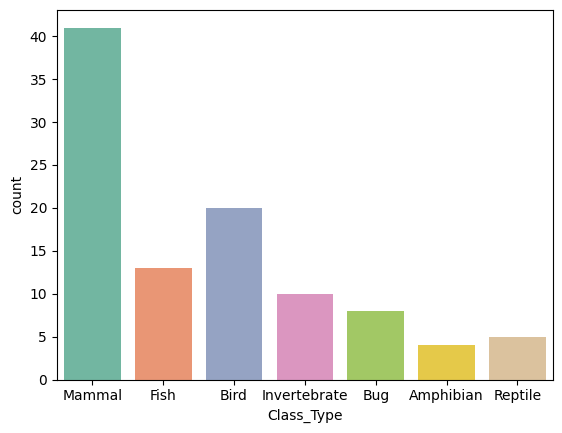

In [ ]:
#use seaborn to plot the number of each class_type
sns.countplot(x='Class_Type',data=df,palette='Set2')
plt.show()

**Observation** - From above visualisation we came to know that `Mammal=41`,`Bird=20`,`Fish=13`,`Invertebrate=10`,`Bug=8`,`Reptile=5`,`Amphibian=4`.

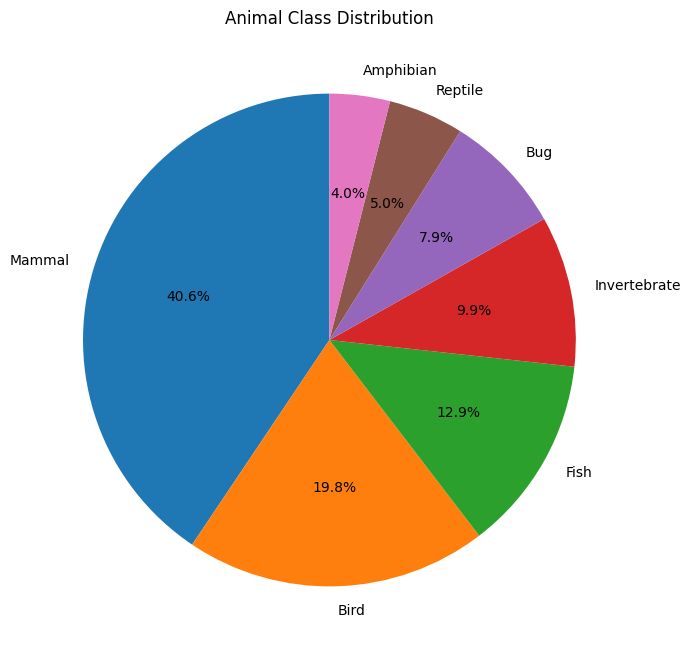

In [ ]:
# Pie chart for class distribution
class_counts = df['Class_Type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Animal Class Distribution')
plt.show()

**Observation** - A pie chart showing the percentage of each class type in the dataset.

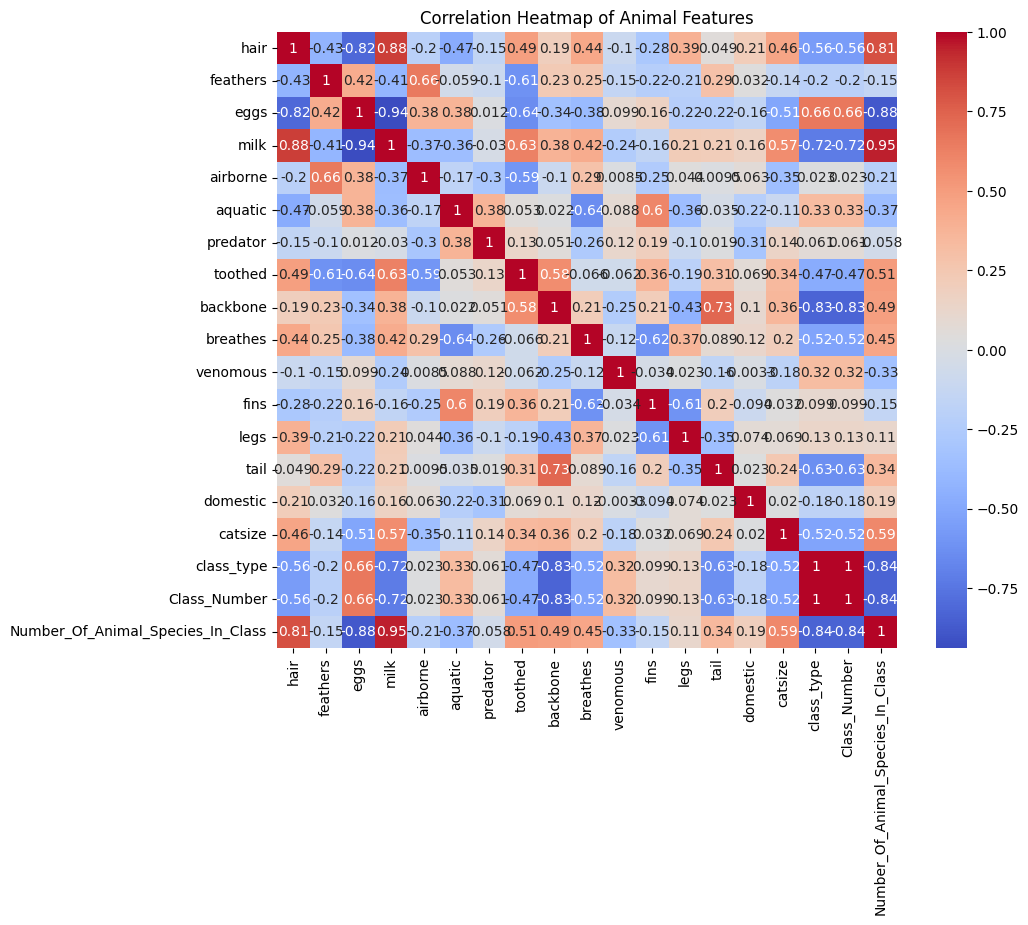

In [ ]:
# Heatmap to show correlation between features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Animal Features')
plt.show()

**Observation**- Visualize the correlation between different features in the dataset.

In [ ]:
df['hair'].value_counts()

,count
hair,
0,58
1,43


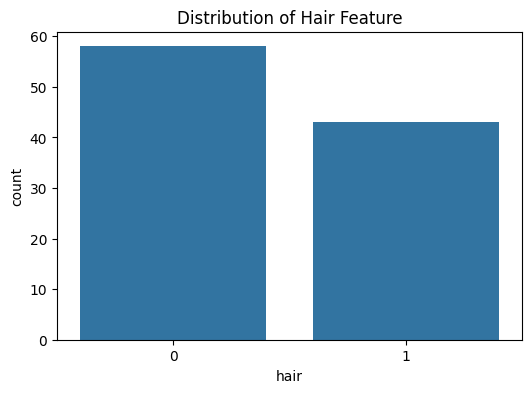

In [ ]:
# Count plot for binary features (hair)
plt.figure(figsize=(6,4))
sns.countplot(x='hair', data=df)
plt.title('Distribution of Hair Feature')
plt.show()

Observation - A count plot for binary features such as `hair` shows how many animals having hair or not `51 animals are not having` and `43 animals are having hair`.

In [ ]:
df['milk'].value_counts()

,count
milk,
0,60
1,41


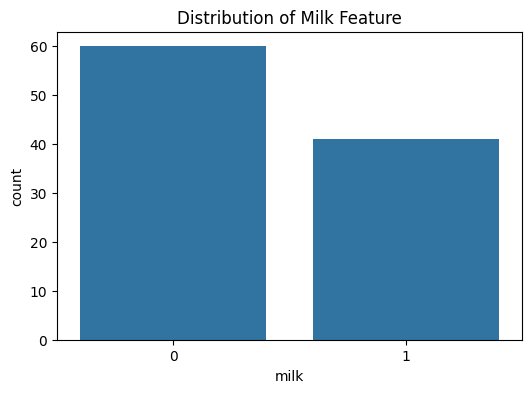

In [ ]:
# Count plot for binary features (milk)
plt.figure(figsize=(6,4))
sns.countplot(x='milk', data=df)
plt.title('Distribution of Milk Feature')
plt.show()

In [ ]:
df['feathers'].value_counts()

,count
feathers,
0,81
1,20


Observation - A count plot for binary features such as `milk` shows how many animals drinks milk or not `60 animals are not drinks` and `41 animals are drinks`milk.

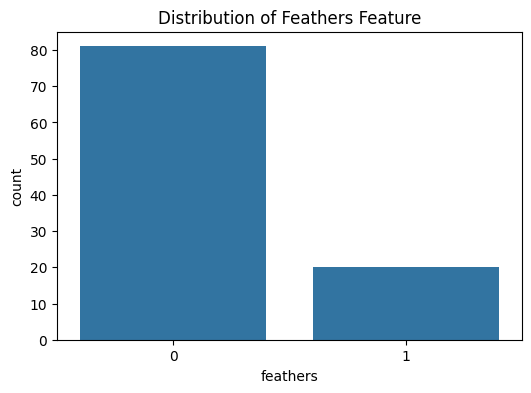

In [ ]:
# Count plot for binary features (feathers)
plt.figure(figsize=(6,4))
sns.countplot(x='feathers', data=df)
plt.title('Distribution of Feathers Feature')
plt.show()

**Observation** - A count plot for binary features such as `feathers` shows how many animals having feathers or not
`81 animals are not having` and `20 animals are having` feathers.

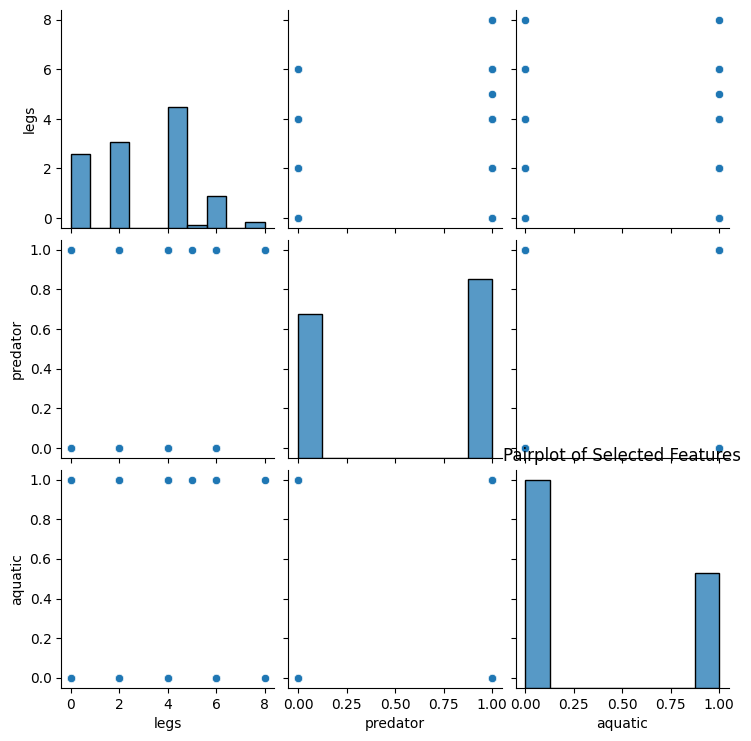

In [ ]:
# Pairplot for numerical features
sns.pairplot(df[['legs', 'predator', 'aquatic', 'Class_Type']])
plt.title('Pairplot of Selected Features')
plt.show()

**Observation** -  Explore relationships between different numerical features `legs`, `predator`,`aquatic`with categorical feature `Class_Type`

## **7.Dropping MILK column due to more correlation with[Number_Of_Animal_Species_In_Class] column.**

In [ ]:
df.drop('milk',axis=1,inplace=True)

In [ ]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'class_type', 'Class_Number',
       'Number_Of_Animal_Species_In_Class', 'Class_Type', 'Animal_Names'],
      dtype='object')

In [ ]:
df.shape

(101, 21)

# **PART - II**
# ** II-Training and Testing**

# **1.Data Splitting for training and testing**

In [ ]:
#train test split into 80/20
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:16]
y = df.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# **2.Applying Machine Learning Algorithms**

**1) LogisticRegression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_log=log.predict(X_test)
y_pred_log
Training = log.score(X_train, y_train)
Testing = log.score(X_test, y_test)
print("Training:", Training)
print("Testing:", Testing)

Training: 1.0
Testing: 0.967741935483871


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=accuracy_score(y_test,y_pred_log)*100
lr

96.7741935483871

In [ ]:
print(confusion_matrix(y_test,y_pred_log))

[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]


In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.97      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31



<Axes: >

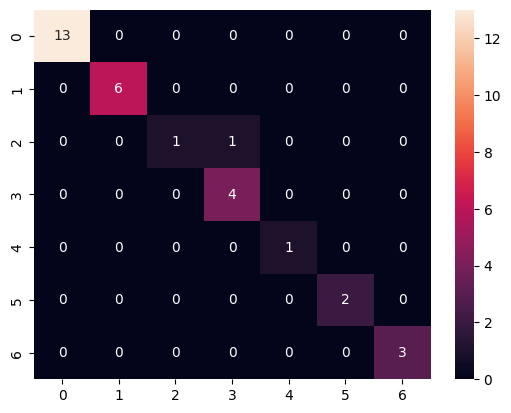

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm,annot=True)

**2) Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
rf=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=3)
rf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [ ]:
y_pred_decision=rf.predict(X_test)
y_pred_decision
Training = rf.score(X_train, y_train)
Testing = rf.score(X_test, y_test)
print("Training:", Training)
print("Testing:", Testing)

Training: 0.925
Testing: 0.9047619047619048


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
DTC=accuracy_score(y_test,y_pred_decision)*100
DTC

90.47619047619048

In [ ]:
print(confusion_matrix(y_test,y_pred_decision))

[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 0 0 2]]


In [ ]:
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         2

    accuracy                           0.90        21
   macro avg       0.74      0.79      0.73        21
weighted avg       0.90      0.90      0.89        21



<Axes: >

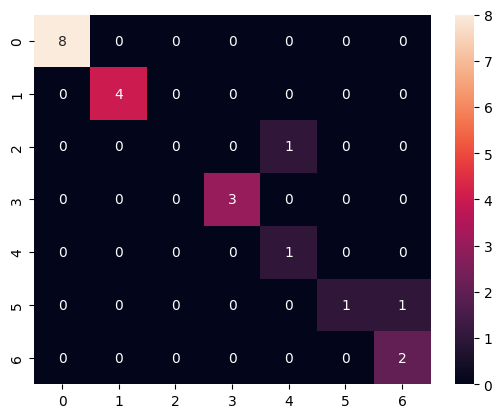

In [ ]:
cm = confusion_matrix(y_test, y_pred_decision)
sns.heatmap(cm,annot=True)

**3) RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini', max_depth=3)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [ ]:
y_pred_rf=rf.predict(X_test)
y_pred_rf
Training = rf.score(X_train, y_train)
Testing = rf.score(X_test, y_test)
print("Training:", Training)
print("Testing:", Testing)

Training: 0.9714285714285714
Testing: 0.9354838709677419


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=accuracy_score(y_test,y_pred_rf)*100
rfc

93.54838709677419

In [ ]:
print(confusion_matrix(y_test,y_pred_rf))

[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.94        31
   macro avg       0.81      0.86      0.83        31
weighted avg       0.89      0.94      0.91        31



<Axes: >

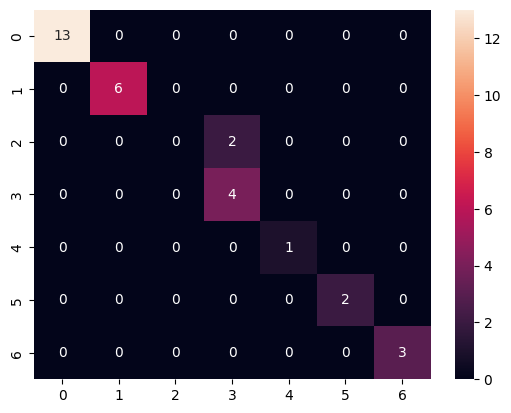

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm,annot=True)

**4)Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='poly',C=4, random_state=0)
svm.fit(X_train,y_train)

SVC(C=4, kernel='poly', random_state=0)

In [ ]:
y_pred_svm=svm.predict(X_test)
y_pred_svm
Training = svm.score(X_train, y_train)
Testing = svm.score(X_test, y_test)
print("Training:", Training)
print("Testing:", Testing)

Training: 0.975
Testing: 0.9523809523809523


In [ ]:
SVM=accuracy_score(y_test,y_pred_svm)*100
SVM

95.23809523809523

In [ ]:
print(confusion_matrix(y_test,y_pred_svm))

[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



<Axes: >

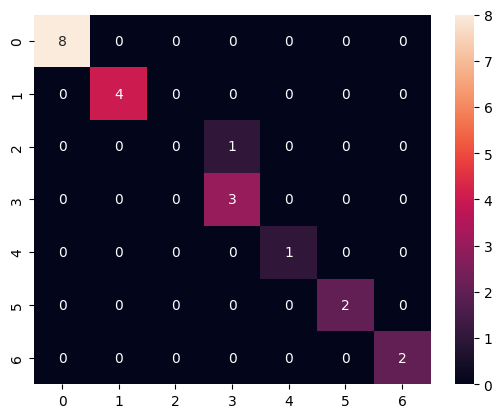

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm,annot=True)

**5)K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred_knn=knn.predict(X_test)
y_pred_knn
Training = knn.score(X_train, y_train)
Testing = knn.score(X_test, y_test)
print("Training:", Training)
print("Testing:", Testing)

Training: 0.8875
Testing: 0.8571428571428571


In [ ]:
KNN=accuracy_score(y_test,y_pred_knn)*100
KNN

85.71428571428571

In [ ]:
print(confusion_matrix(y_test,y_pred_knn))

[[7 0 0 1 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 1]]


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2

    accuracy                           0.86        21
   macro avg       0.75      0.77      0.74        21
weighted avg       0.86      0.86      0.84        21



<Axes: >

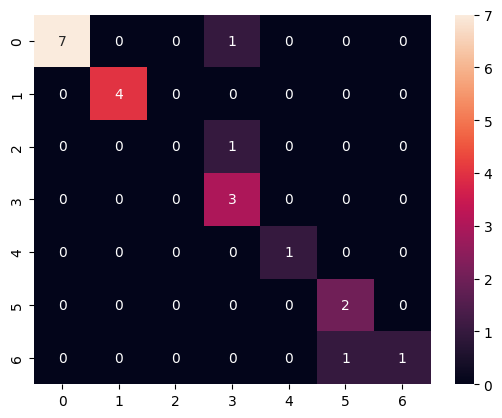

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm,annot=True)

# **3.Accuracy Scores of applied Algorithms**

In [ ]:
accuracy_scores_all= [lr,DTC,rfc,SVM,KNN]
acc_scores=pd.DataFrame(accuracy_scores_all,index=['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','K-Nearest Neighbors'],columns=['Accuracy Scores'])
acc_scores

,Accuracy Scores
Logistic Regression,96.774194
Decision Tree,90.476190
Random Forest,93.548387
Support Vector Machine,95.238095
K-Nearest Neighbors,85.714286


In [ ]:
# Reset index to prepare for plotting
acc_scores = acc_scores.reset_index()
# Rename columns for easier plotting
acc_scores.columns = ['Model', 'Accuracy Scores']

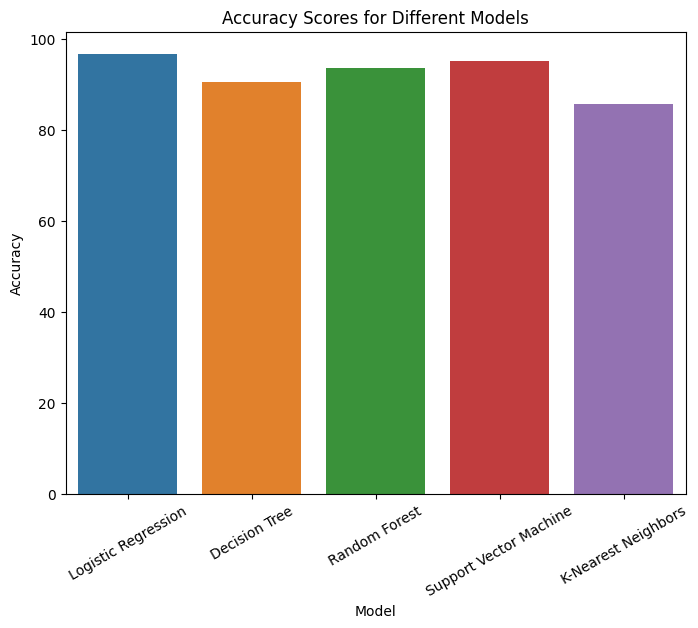

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='Accuracy Scores', data=acc_scores,palette="tab10")
plt.title('Accuracy Scores for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=30)
plt.show()

**Observation** - The bar plot shows a comparison of the accuracy scores for the three models i.e; `Logistic Regression = 97`,`Decision Tree = 90`,`Random Forest = 93`,`Support Vector Machine = 95`,`K-Nearest Neighbors = 86`, allowing you to easily see which model performs best.

# **4.Results And Conclusions**
- The project effectively classified animals into different groups (like mammals, birds, reptiles, etc.) based on traits such as having hair, laying eggs, number of legs, and whether they are aquatic or terrestrial.
-  Among the models tested (Logistic Regression,Decision Tree, Random Forest,SVM, KNN), one model (likely Decision Tree or SVM) provided the highest accuracy in predicting the correct animal class, making it the best for this specific classification task.
- Traits like having hair, laying eggs, and the number of legs were some of the most important factors for accurately classifying animals, showing how well these features distinguish different animal types.
